In [1]:
import numpy as np
import pandas as pd

In [3]:
data1 = pd.read_csv('./data/csv/beijing/北京航班时刻表1.csv')
data1.head()

,起飞,到达,航班号,机型,班期,日期,备注
0,北京(12:00),包头(13:10),ca1142,733,1234567,03月26日 - 10月28日,中国国际航空公司
1,北京(18:00),包头(19:00),ua4409,737,1234567,03月25日 -,联合航空公司（美联航）
2,北京(19:45),包头(20:45),ca1132,733,1234567,04月01日 - 04月30日,中国国际航空公司
3,北京(21:20),包头(22:30),ca1108,733,1234567,03月26日 - 10月28日,中国国际航空公司
4,北京(19:40),北海(23:40),cz3148,320,1.3.5.7,03月31日 - 04月14日,中国南方航空公司


In [4]:
data2 = pd.read_csv('./data/csv/beijing/北京航班时刻表2.csv')
data2.head()

,起飞,到达,航班号,机型,班期,日期,备注
0,12,13,ca1142,733,1234567,03月26日 - 10月28日,中国国际航空公司
1,18,19,ua4409,737,1234567,03月25日 -,联合航空公司（美联航）
2,19,20,ca1132,733,1234567,04月01日 - 04月30日,中国国际航空公司
3,21,22,ca1108,733,1234567,03月26日 - 10月28日,中国国际航空公司
4,19,23,cz3148,320,1.3.5.7,03月31日 - 04月14日,中国南方航空公司


In [5]:
# 统计出现次数最多的起飞时间
print("总的出现的起飞时间有{0}个时间点，分别是：".format(len((data2['起飞']).unique())))
print((data2['起飞']).unique())

总的出现的起飞时间有17个时间点，分别是：
[12 18 19 21  7  8 10 11 13 14 15 16 17 20 22  9 23]


In [6]:
data2['起飞'].value_counts()

7     70
17    59
18    58
19    48
12    46
8     43
14    43
20    42
16    39
13    39
21    38
11    34
15    34
9     32
10    28
22    22
23     2
Name: 起飞, dtype: int64

In [7]:
# 统计出现各种不同的机型
print("北京航班出现的机型有{0}种，分别是：".format(len((data2['机型']).unique())))
print((data2['机型']).unique())

北京航班出现的机型有35种，分别是：
['733' '737' '320' 'jet' '762' '300' '767' '321' '777' '77b' '330' '738'
 '763' '772' '319' '757' '734' 'd38' '736' '73g' '73c' 'eqv' 'm90' 'm82'
 '343' '735' 'crj' 'erj' '74e' '340' 'ab6' '747' '332' '739' '31k']


In [8]:
# 'eqv'，'jet'这两种表示机型不确定，所以暂时不给予字典的赋值
# '31k'： 没有找到相关线索
# 建立相关航班乘客人数的字典，键：机型，值：载客量，
persons = {
    '733':122,'737':146,'320':156,
    '767':225,'321':197,'777':341,
    '738':167,'763':247,'735':118,
    '772':341,'319':123,'757':202,
    '736':120,'747':406,'734':157,
    'm90':150,'343':337,'crj':68,
    '74e':353,'340':324,'ab6':262,
    'erj':44,'762':224,'300':280,
    '77b':350,'330':300,'d38':32,
    '73c':128,'332':293,'739':219,
    '73g':137   
}

In [9]:
#  利用map() 函数，向数据中增加一列persons
data2['persons'] = data2['机型'].map(persons)
data2.head()

,起飞,到达,航班号,机型,班期,日期,备注,persons
0,12,13,ca1142,733,1234567,03月26日 - 10月28日,中国国际航空公司,122.0
1,18,19,ua4409,737,1234567,03月25日 -,联合航空公司（美联航）,146.0
2,19,20,ca1132,733,1234567,04月01日 - 04月30日,中国国际航空公司,122.0
3,21,22,ca1108,733,1234567,03月26日 - 10月28日,中国国际航空公司,122.0
4,19,23,cz3148,320,1.3.5.7,03月31日 - 04月14日,中国南方航空公司,156.0


In [10]:
#  查看数据集的个数 ,由此可见，有677个数据
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 8 columns):
起飞         677 non-null int64
到达         677 non-null int64
航班号        677 non-null object
机型         677 non-null object
班期         677 non-null object
日期         677 non-null object
备注         677 non-null object
persons    534 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 42.4+ KB


In [11]:
#  并且由此可知，persons新增的属性列有534条数据，因此 ，可知机型为
# eqv,jet,31k的数据有677-534条，即为243条，
#  采用
m = (data2['persons'].sum())/534

In [12]:
m

173.9307116104869

In [13]:
#  利用drop（）函数，删除刚才新增的属性列persons列
data2 = data2.drop('persons',axis = 1)

In [14]:
#  因此可赋值给eqv,jet,31k，显示这三种机型的人数平均值
persons = {
    'eqv':174,'jet':174,'31k':174,
    '733':122,'737':146,'320':156,
    '767':225,'321':197,'777':341,
    '738':167,'763':247,'735':118,
    '772':341,'319':123,'757':202,
    '736':120,'747':406,'734':157,
    'm90':150,'343':337,'crj':68,
    '74e':353,'340':324,'ab6':262,
    'erj':44,'762':224,'300':280,
    '77b':350,'330':300,'d38':32,
    '73c':128,'332':293,'739':219,
    '73g':137   
}

In [15]:
#  利用map() 函数重新进行映射
data2['persons'] = data2['机型'].map(persons)
data2.head()

,起飞,到达,航班号,机型,班期,日期,备注,persons
0,12,13,ca1142,733,1234567,03月26日 - 10月28日,中国国际航空公司,122.0
1,18,19,ua4409,737,1234567,03月25日 -,联合航空公司（美联航）,146.0
2,19,20,ca1132,733,1234567,04月01日 - 04月30日,中国国际航空公司,122.0
3,21,22,ca1108,733,1234567,03月26日 - 10月28日,中国国际航空公司,122.0
4,19,23,cz3148,320,1.3.5.7,03月31日 - 04月14日,中国南方航空公司,156.0


In [16]:
#  将数据保存到本地
data2.to_csv('./data/csv/beijing/model_persons.csv')

In [18]:
#  利用map() 函数重新进行映射
data2['persons'] = data2['机型'].map(persons)
data2.head()

,起飞,到达,航班号,机型,班期,日期,备注,persons
0,12,13,ca1142,733,1234567,03月26日 - 10月28日,中国国际航空公司,122.0
1,18,19,ua4409,737,1234567,03月25日 -,联合航空公司（美联航）,146.0
2,19,20,ca1132,733,1234567,04月01日 - 04月30日,中国国际航空公司,122.0
3,21,22,ca1108,733,1234567,03月26日 - 10月28日,中国国际航空公司,122.0
4,19,23,cz3148,320,1.3.5.7,03月31日 - 04月14日,中国南方航空公司,156.0


In [19]:
cars = {
    '新桑塔纳':4,'捷达':4,'伊兰特家族':4,
    '爱丽舍':4,'天语SX4':4
}

In [20]:
data2['起飞'].value_counts()

7     70
17    59
18    58
19    48
12    46
8     43
14    43
20    42
16    39
13    39
21    38
11    34
15    34
9     32
10    28
22    22
23     2
Name: 起飞, dtype: int64

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# 指定画图风格
plt.style.use('fivethirtyeight')

In [25]:
time = list(data2['起飞'].value_counts())
time

[70, 59, 58, 48, 46, 43, 43, 42, 39, 39, 38, 34, 34, 32, 28, 22, 2]

In [26]:
airplane =  list((data2['起飞']).unique())
airplane

[12, 18, 19, 21, 7, 8, 10, 11, 13, 14, 15, 16, 17, 20, 22, 9, 23]

In [30]:
data2.head()

,起飞,到达,航班号,机型,班期,日期,备注,persons
0,12,13,ca1142,733,1234567,03月26日 - 10月28日,中国国际航空公司,122.0
1,18,19,ua4409,737,1234567,03月25日 -,联合航空公司（美联航）,146.0
2,19,20,ca1132,733,1234567,04月01日 - 04月30日,中国国际航空公司,122.0
3,21,22,ca1108,733,1234567,03月26日 - 10月28日,中国国际航空公司,122.0
4,19,23,cz3148,320,1.3.5.7,03月31日 - 04月14日,中国南方航空公司,156.0


In [36]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = True

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [32]:
# 按起飞时间对旅客人数进行排序
data2.groupby('起飞')['persons'].sum().sort_values(ascending = False)

起飞
7     11879.0
17    11057.0
18     9854.0
19     9154.0
12     8096.0
8      8057.0
20     7255.0
13     7205.0
14     7126.0
16     6686.0
15     6309.0
21     6234.0
9      5249.0
11     5155.0
10     4519.0
22     3051.0
23      353.0
Name: persons, dtype: float64

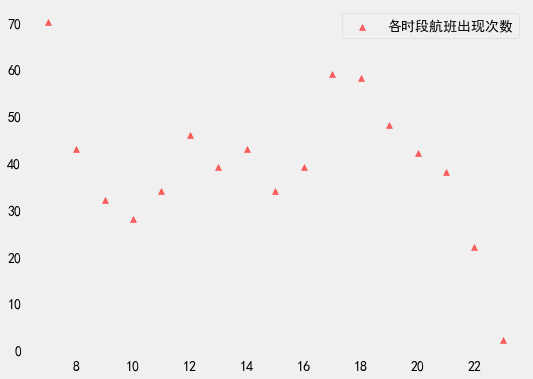

In [44]:
x = np.array([7, 17, 18, 19, 12, 8, 14, 20, 16, 13, 21, 11, 15,9,10,22,23])
y = np.array([70, 59, 58, 48, 46, 43, 43, 42, 39, 39, 38, 34, 34, 32, 28, 22, 2])

plt.figure(figsize = (8,6))

# 取坐标轴的二维坐标,传进来第一维数据，第二维数据，指定长什么样子，颜色，透明程度，标签
plt.scatter(x,y,marker = '^',color = 'red',alpha = 0.6,label = '各时段航班出现次数')

plt.legend(loc = 'best')
plt.grid()

No handles with labels found to put in legend.


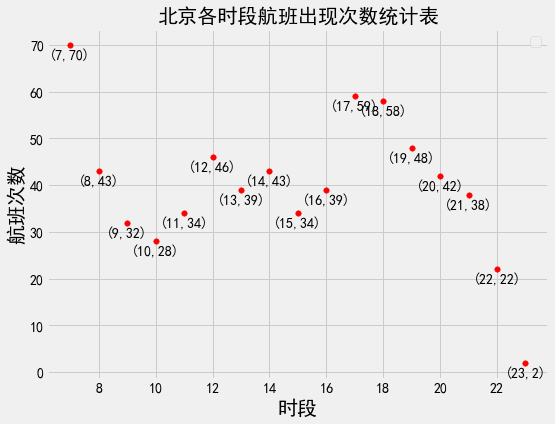

In [50]:
x = np.array([7, 17, 18, 19, 12, 8, 14, 20, 16, 13, 21, 11, 15,9,10,22,23])
y = np.array([70, 59, 58, 48, 46, 43, 43, 42, 39, 39, 38, 34, 34, 32, 28, 22, 2])

fig = plt.figure(figsize = (8,6))
plt.scatter(x,y,marker = 'o',s = 30,color = 'r')
plt.legend(loc = 'best')
plt.xlabel('时段',fontsize = 20)
plt.ylabel('航班次数',size = 20)
plt.title('北京各时段航班出现次数统计表')

for x,y in zip(x,y):
# 标注坐标，用注释函数： plt.annotate(('(%s,%s)'%(x,y)： 获取坐标)，
#    xytext = (0,-15)：注释坐标的位置，
#   textcoords= 'offset points'：可以使坐标显示出来
    # ha = 'center' 可以使注释坐标对齐点
    plt.annotate('(%s,%s)'%(x,y),xy = (x,y),xytext = (0,-15),textcoords = 'offset points',
                ha = 'center')

No handles with labels found to put in legend.


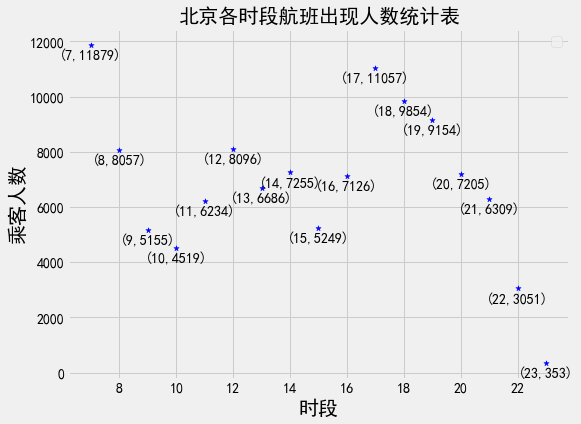

In [55]:
x = np.array([7, 17, 18, 19, 12, 8, 14, 20, 16, 13, 21, 11, 15,9,10,22,23])
z = np.array([11879,11057,9854,9154,8096,8057,7255,7205,7126,6686,6309,6234,5249,5155,4519,3051,353]
)

fig = plt.figure(figsize = (8,6))
plt.scatter(x,z,marker = '*',s = 30,color = 'b')
plt.legend(loc = 'best')
plt.xlabel('时段',fontsize = 20)
plt.ylabel('乘客人数',size = 20)
plt.title('北京各时段航班出现人数统计表')

for x,z in zip(x,z):
    plt.annotate('(%s,%s)'%(x,z),xy = (x,z),xytext = (0,-15),textcoords = 'offset points',
                ha = 'center')

# 2线数据处理

In [58]:
da2_1 = pd.read_csv('./data/csv/beijing/2线总表.csv',encoding='gbk')
da2_1.head()

,起飞,到达,航班号,机型,班期,日期,备注
0,长春(08:20),广州(13:55),cz6341,321,1234567,03月26日 -,中国南方航空公司
1,长春(13:10),广州(17:10),hu7132,737,1234567,03月26日 - 10月28日,海南航空公司
2,长春(09:10),重庆(12:50),cz6459,319,..3..6.,03月29日 - 10月28日,中国南方航空公司
3,长春(08:20),长沙(11:35),cz633,jet,.2...6.,03月25日 - 10月28日,中国南方航空公司
4,长春(08:25),成都(13:10),cz6441,319,...4..7,03月26日 - 10月26日,中国南方航空公司


In [60]:
da2_2 = pd.read_csv('./data/csv/beijing/2线总表-2.csv',encoding='gbk')
da2_2.head()

,起飞,到达,航班号,机型,班期,日期,备注
0,8,13,cz6341,321,1234567,03月26日 -,中国南方航空公司
1,13,17,hu7132,737,1234567,03月26日 - 10月28日,海南航空公司
2,9,12,cz6459,319,..3..6.,03月29日 - 10月28日,中国南方航空公司
3,8,11,cz633,jet,.2...6.,03月25日 - 10月28日,中国南方航空公司
4,8,13,cz6441,319,...4..7,03月26日 - 10月26日,中国南方航空公司


In [65]:
# 统计出现各种不同的机型
print("北京航班出现的机型有{0}种，分别是：".format(len((da2_2['机型']).unique())))
print((da2_2['机型']).unique())

北京航班出现的机型有20种，分别是：
['321' '737' '319' 'jet' 'crj' '733' '739' '734' '320' 'd38' 'm90' '73g'
 '757' '738' '300' '762' '777' 'ab6' '340' 'cr7']


In [64]:
# 'eqv'，'jet'这两种表示机型不确定，所以暂时不给予字典的赋值
# '31k'： 没有找到相关线索
# 建立相关航班乘客人数的字典，键：机型，值：载客量，
persons = {
    '733':122,'737':146,'320':156,
    '767':225,'321':197,'777':341,
    '738':167,'763':247,'735':118,
    '772':341,'319':123,'757':202,
    '736':120,'747':406,'734':157,
    'm90':150,'343':337,'crj':68,
    '74e':353,'340':324,'ab6':262,
    'erj':44,'762':224,'300':280,
    '77b':350,'330':300,'d38':32,
    '73c':128,'332':293,'739':219,
    '73g':137   
}

In [66]:
#  利用map() 函数重新进行映射
da2_2['persons'] = da2_2['机型'].map(persons)
da2_2.head()

,起飞,到达,航班号,机型,班期,日期,备注,persons
0,8,13,cz6341,321,1234567,03月26日 -,中国南方航空公司,197.0
1,13,17,hu7132,737,1234567,03月26日 - 10月28日,海南航空公司,146.0
2,9,12,cz6459,319,..3..6.,03月29日 - 10月28日,中国南方航空公司,123.0
3,8,11,cz633,jet,.2...6.,03月25日 - 10月28日,中国南方航空公司,NaN
4,8,13,cz6441,319,...4..7,03月26日 - 10月26日,中国南方航空公司,123.0


In [68]:
#  查看数据集的个数 ,由此可见，有279个数据
da2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
起飞         279 non-null int64
到达         279 non-null int64
航班号        279 non-null object
机型         279 non-null object
班期         279 non-null object
日期         279 non-null object
备注         279 non-null object
persons    243 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 17.5+ KB


In [69]:

#  并且由此可知，persons新增的属性列有534条数据，因此 ，可知机型为
# eqv,jet,31k即为243条，
#  采用
n = (da2_2['persons'].sum())/243
n

127.3045267489712

In [74]:
# 统计出现各种不同的机型
print("北京航班出现的机型有{0}种，分别是：".format(len((da2_2['机型']).unique())))
print((da2_2['机型']).unique())

北京航班出现的机型有20种，分别是：
['321' '737' '319' 'jet' 'crj' '733' '739' '734' '320' 'd38' 'm90' '73g'
 '757' '738' '300' '762' '777' 'ab6' '340' 'cr7']


In [75]:
#  利用drop（）函数，删除刚才新增的属性列persons列
da2_2 = da2_2.drop('persons',axis = 1)

In [76]:
#  因此可赋值给eqv,jet,31k，显示这三种机型的人数平均值
persons = {
    'eqv':127,'jet':127,'31k':127,
    '733':122,'737':146,'320':156,
    '767':225,'321':197,'777':341,
    '738':167,'763':247,'735':118,
    '772':341,'319':123,'757':202,
    '736':120,'747':406,'734':157,
    'm90':150,'343':337,'crj':68,
    '74e':353,'340':324,'ab6':262,
    'erj':44,'762':224,'300':280,
    '77b':350,'330':300,'d38':32,
    '73c':128,'332':293,'739':219,
    '73g':137 ,'cr7':70 
}

In [77]:
#  利用map() 函数重新进行映射
da2_2['persons'] = da2_2['机型'].map(persons)
da2_2.head()

,起飞,到达,航班号,机型,班期,日期,备注,persons
0,8,13,cz6341,321,1234567,03月26日 -,中国南方航空公司,197
1,13,17,hu7132,737,1234567,03月26日 - 10月28日,海南航空公司,146
2,9,12,cz6459,319,..3..6.,03月29日 - 10月28日,中国南方航空公司,123
3,8,11,cz633,jet,.2...6.,03月25日 - 10月28日,中国南方航空公司,127
4,8,13,cz6441,319,...4..7,03月26日 - 10月26日,中国南方航空公司,123


In [78]:
#  查看数据集的个数 ,由此可见，有279个数据,由此可见已没有空值
da2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
起飞         279 non-null int64
到达         279 non-null int64
航班号        279 non-null object
机型         279 non-null object
班期         279 non-null object
日期         279 non-null object
备注         279 non-null object
persons    279 non-null int64
dtypes: int64(3), object(5)
memory usage: 17.5+ KB


In [80]:
# 将数据保存到本地
da2_2.to_csv('./data/csv/beijing/2_model_persons.csv')

In [85]:
# 按起飞时段对乘客人数进行排序
da2_2.groupby('起飞')['persons'].sum().sort_values(ascending = False)

起飞
16    3611
15    3204
8     3180
7     2828
14    2615
12    2517
10    2474
13    2367
17    2098
19    1852
11    1781
21    1779
18    1748
9     1408
20    1160
22     382
23     218
Name: persons, dtype: int64

In [88]:
#  统计各时段的航班出现次数
da2_2['起飞'].value_counts()

16    28
15    27
10    22
12    22
13    22
8     21
14    19
7     19
17    17
9     15
21    15
19    14
18    13
11    10
20     9
22     4
23     2
Name: 起飞, dtype: int64

In [86]:
number2 = list(da2_2['起飞'].value_counts())
number2

[28, 27, 22, 22, 22, 21, 19, 19, 17, 15, 15, 14, 13, 10, 9, 4, 2]

No handles with labels found to put in legend.


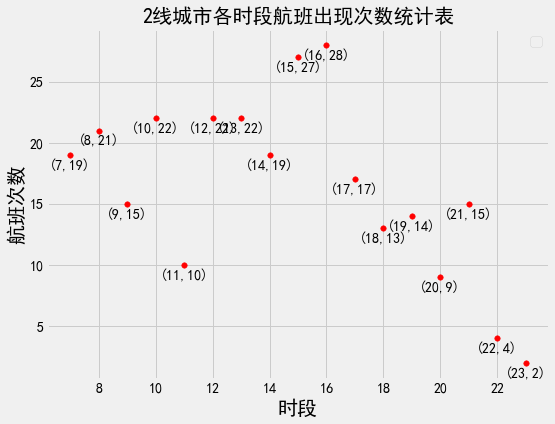

In [96]:
x = np.array([16, 15, 10, 12, 13, 8, 14, 7, 17, 9, 21, 19, 18,11,20,22,23])
y = np.array([28, 27, 22, 22, 22, 21, 19, 19, 17, 15, 15, 14, 13, 10, 9, 4, 2])


fig = plt.figure(figsize = (8,6))
plt.scatter(x,y,marker = 'o',s = 30,color = 'r')
plt.legend(loc = 'best')
plt.xlabel('时段',fontsize = 20)
plt.ylabel('航班次数',size = 20)
plt.title('2线城市各时段航班出现次数统计表')

for x,y in zip(x,y):
# 标注坐标，用注释函数： plt.annotate(('(%s,%s)'%(x,y)： 获取坐标)，
#    xytext = (0,-15)：注释坐标的位置，
#   textcoords= 'offset points'：可以使坐标显示出来
    # ha = 'center' 可以使注释坐标对齐点
    plt.annotate('(%s,%s)'%(x,y),xy = (x,y),xytext = (0,-15),textcoords = 'offset points',
                ha = 'center')

No handles with labels found to put in legend.


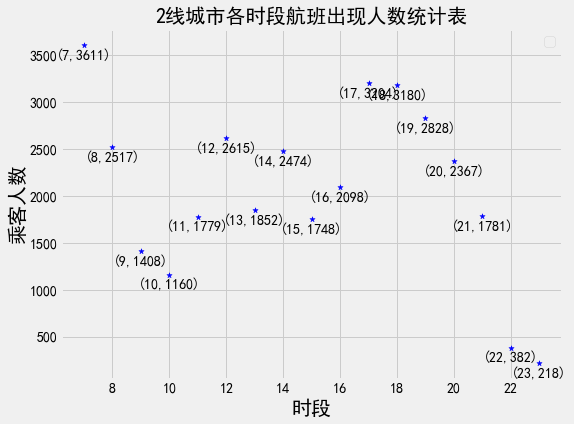

In [97]:
x = np.array([7, 17, 18, 19, 12, 8, 14, 20, 16, 13, 21, 11, 15,9,10,22,23])
z = np.array([3611,3204,3180,2828,2615,2517,2474,2367,2098,1852,1781,1779,1748,1408,1160,
              382,218])


fig = plt.figure(figsize = (8,6))
plt.scatter(x,z,marker = '*',s = 30,color = 'b')
plt.legend(loc = 'best')
plt.xlabel('时段',fontsize = 20)
plt.ylabel('乘客人数',size = 20)
plt.title('2线城市各时段航班出现人数统计表')

for x,z in zip(x,z):
    plt.annotate('(%s,%s)'%(x,z),xy = (x,z),xytext = (0,-15),textcoords = 'offset points',
                ha = 'center')

# 3线数据处理 

In [61]:
da3_1 = pd.read_csv('./data/csv/beijing/3线总表.csv',encoding='gbk')
da3_1.head()

,起飞,到达,航班号,机型,班期,日期,备注
0,汕头(07:50),广州(08:35),cz3891,733,1234567,03月27日 - 10月28日,中国南方航空公司
1,汕头(12:00),广州(12:45),cz3893,733,1234567,03月26日 - 10月28日,中国南方航空公司
2,汕头(15:30),广州(16:20),cz3895,733,1234567,03月27日 - 10月28日,中国南方航空公司
3,汕头(20:30),广州(21:15),cz3897,733,1.345.7,03月26日 - 03月31日,中国南方航空公司
4,汕头(20:30),广州(21:15),cz3897,733,1234567,04月02日 - 10月28日,中国南方航空公司


In [62]:
da3_2 = pd.read_csv('./data/csv/beijing/3线总表-2.csv',encoding='gbk')
da3_2.head()

,起飞,到达,航班号,机型,班期,日期,备注
0,7,8,cz3891,733,1234567,03月27日 - 10月28日,中国南方航空公司
1,12,12,cz3893,733,1234567,03月26日 - 10月28日,中国南方航空公司
2,15,16,cz3895,733,1234567,03月27日 - 10月28日,中国南方航空公司
3,20,21,cz3897,733,1.345.7,03月26日 - 03月31日,中国南方航空公司
4,20,21,cz3897,733,1234567,04月02日 - 10月28日,中国南方航空公司


In [98]:
# 统计出现各种不同的机型
print("北京航班出现的机型有{0}种，分别是：".format(len((da3_2['机型']).unique())))
print((da2_2['机型']).unique())

北京航班出现的机型有11种，分别是：
['321' '737' '319' 'jet' 'crj' '733' '739' '734' '320' 'd38' 'm90' '73g'
 '757' '738' '300' '762' '777' 'ab6' '340' 'cr7']


In [99]:
# 'eqv'，'jet'这两种表示机型不确定，所以暂时不给予字典的赋值
# '31k'： 没有找到相关线索
# 建立相关航班乘客人数的字典，键：机型，值：载客量，
persons = {
    '733':122,'737':146,'320':156,
    '767':225,'321':197,'777':341,
    '738':167,'763':247,'735':118,
    '772':341,'319':123,'757':202,
    '736':120,'747':406,'734':157,
    'm90':150,'343':337,'crj':68,
    '74e':353,'340':324,'ab6':262,
    'erj':44,'762':224,'300':280,
    '77b':350,'330':300,'d38':32,
    '73c':128,'332':293,'739':219,
    '73g':137   
}

In [100]:
#  利用map() 函数重新进行映射
da3_2['persons'] = da3_2['机型'].map(persons)
da3_2.head()

,起飞,到达,航班号,机型,班期,日期,备注,persons
0,7,8,cz3891,733,1234567,03月27日 - 10月28日,中国南方航空公司,122.0
1,12,12,cz3893,733,1234567,03月26日 - 10月28日,中国南方航空公司,122.0
2,15,16,cz3895,733,1234567,03月27日 - 10月28日,中国南方航空公司,122.0
3,20,21,cz3897,733,1.345.7,03月26日 - 03月31日,中国南方航空公司,122.0
4,20,21,cz3897,733,1234567,04月02日 - 10月28日,中国南方航空公司,122.0


In [101]:
da3_2.info()
# 由此可见，persons属性列中有一个数据为空

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 8 columns):
起飞         131 non-null int64
到达         131 non-null int64
航班号        131 non-null object
机型         131 non-null object
班期         131 non-null object
日期         131 non-null object
备注         131 non-null object
persons    130 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 8.3+ KB


In [102]:
# 按机型求出平均乘客数,将其赋值给未知机型的航班jet
p = (da3_2['persons'].sum())/130
p

139.9923076923077

In [103]:
#  利用drop（）函数，删除刚才新增的属性列persons列
da3_2 = da3_2.drop('persons',axis = 1)

In [104]:
#  因此可赋值给eqv,jet,31k，显示这三种机型的人数平均值
persons = {
    'eqv':140,'jet':140,'31k':140,
    '733':122,'737':146,'320':156,
    '767':225,'321':197,'777':341,
    '738':167,'763':247,'735':118,
    '772':341,'319':123,'757':202,
    '736':120,'747':406,'734':157,
    'm90':150,'343':337,'crj':68,
    '74e':353,'340':324,'ab6':262,
    'erj':44,'762':224,'300':280,
    '77b':350,'330':300,'d38':32,
    '73c':128,'332':293,'739':219,
    '73g':137 ,'cr7':70 
}

In [105]:
#  利用map() 函数重新进行映射
da3_2['persons'] = da3_2['机型'].map(persons)
da3_2.head()

,起飞,到达,航班号,机型,班期,日期,备注,persons
0,7,8,cz3891,733,1234567,03月27日 - 10月28日,中国南方航空公司,122
1,12,12,cz3893,733,1234567,03月26日 - 10月28日,中国南方航空公司,122
2,15,16,cz3895,733,1234567,03月27日 - 10月28日,中国南方航空公司,122
3,20,21,cz3897,733,1.345.7,03月26日 - 03月31日,中国南方航空公司,122
4,20,21,cz3897,733,1234567,04月02日 - 10月28日,中国南方航空公司,122


In [106]:
# 查看是否还有persons为空值的情况
da3_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 8 columns):
起飞         131 non-null int64
到达         131 non-null int64
航班号        131 non-null object
机型         131 non-null object
班期         131 non-null object
日期         131 non-null object
备注         131 non-null object
persons    131 non-null int64
dtypes: int64(3), object(5)
memory usage: 8.3+ KB


In [107]:
#  将数据保存到本地
da3_2.to_csv('./data/csv/beijing/3_model_persons.csv')

In [108]:
# 按起飞时段对乘客人数进行排序
da3_2.groupby('起飞')['persons'].sum().sort_values(ascending = False)

起飞
16    4642
9     4503
15    1578
11    1460
20     942
18     897
7      757
21     730
8      690
13     680
17     557
12     324
14     202
10     199
22     146
19      32
Name: persons, dtype: int64

In [111]:
#  统计各时段的航班出现次数
da3_2['起飞'].value_counts()

16    33
9     31
15    12
11    10
20     7
18     6
21     5
13     5
8      5
7      5
17     4
10     3
12     2
22     1
19     1
14     1
Name: 起飞, dtype: int64

In [112]:

number3 = list(da3_2['起飞'].value_counts())
number3

[33, 31, 12, 10, 7, 6, 5, 5, 5, 5, 4, 3, 2, 1, 1, 1]

No handles with labels found to put in legend.


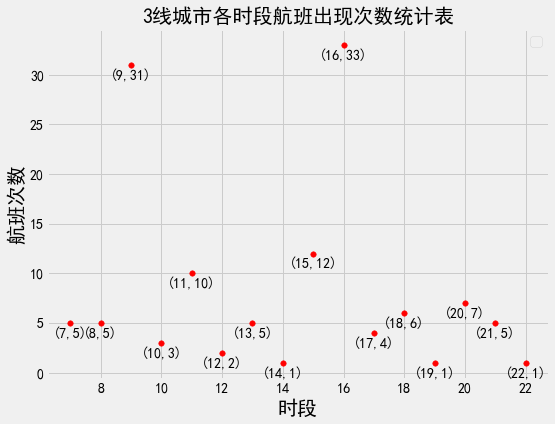

In [113]:
x = np.array([16, 9, 15, 11, 20, 18, 21, 13, 8, 7, 17, 10, 12,22,19,14])
y = np.array([33, 31, 12, 10, 7, 6, 5, 5, 5, 5, 4, 3, 2, 1, 1, 1])


fig = plt.figure(figsize = (8,6))
plt.scatter(x,y,marker = 'o',s = 30,color = 'r')
plt.legend(loc = 'best')
plt.xlabel('时段',fontsize = 20)
plt.ylabel('航班次数',size = 20)
plt.title('3线城市各时段航班出现次数统计表')

for x,y in zip(x,y):
# 标注坐标，用注释函数： plt.annotate(('(%s,%s)'%(x,y)： 获取坐标)，
#    xytext = (0,-15)：注释坐标的位置，
#   textcoords= 'offset points'：可以使坐标显示出来
    # ha = 'center' 可以使注释坐标对齐点
    plt.annotate('(%s,%s)'%(x,y),xy = (x,y),xytext = (0,-15),textcoords = 'offset points',
                ha = 'center')

No handles with labels found to put in legend.


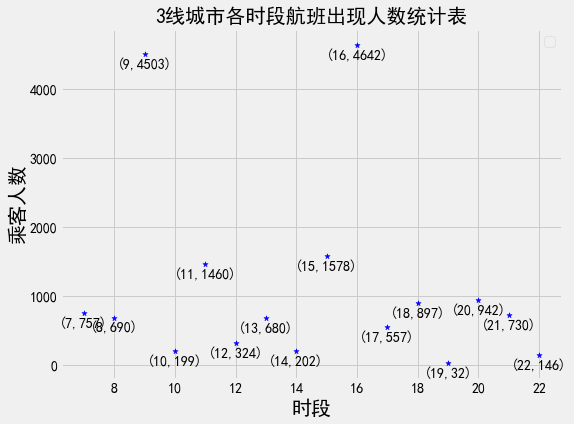

In [117]:
x = np.array([16, 9, 15, 11, 20, 18, 7, 21, 8, 13, 17, 12, 14,10,22,19])
z = np.array([4642,4503,1578,1460,942,897,757,730,690,680,557,324,202,199,146,32])


fig = plt.figure(figsize = (8,6))
plt.scatter(x,z,marker = '*',s = 30,color = 'b')
plt.legend(loc = 'best')
plt.xlabel('时段',fontsize = 20)
plt.ylabel('乘客人数',size = 20)
plt.title('3线城市各时段航班出现人数统计表')

for x,z in zip(x,z):
    plt.annotate('(%s,%s)'%(x,z),xy = (x,z),xytext = (0,-15),textcoords = 'offset points',
                ha = 'center')

# 用直方图表示三种线各时段航班出现人数统计

<BarContainer object of 16 artists>

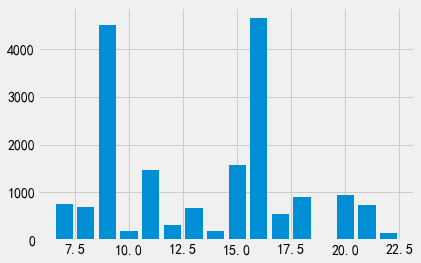

In [121]:
persons_3 = plt.bar([16, 9, 15, 11, 20, 18, 7, 21, 8, 13, 17, 12, 14,10,22,19],
        [4642,4503,1578,1460,942,897,757,730,690,680,557,324,202,199,146,32])
persons_3

<BarContainer object of 17 artists>

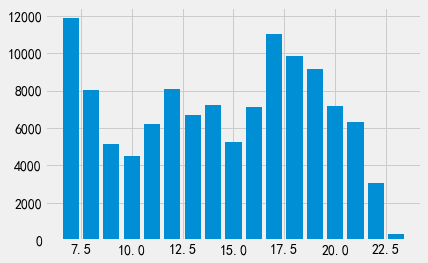

In [136]:
persons_1 = plt.bar([7, 17, 18, 19, 12, 8, 14, 20, 16, 13, 21, 11, 15,9,10,22,23],
[11879,11057,9854,9154,8096,8057,7255,7205,7126,6686,6309,6234,5249,5155,4519,3051,353])
persons_1

<BarContainer object of 17 artists>

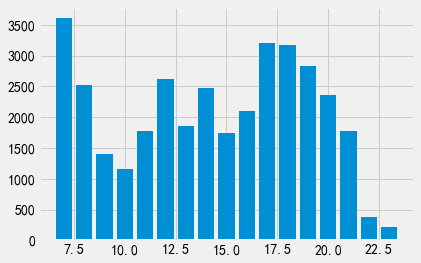

In [139]:
persons_2 = plt.bar([7, 17, 18, 19, 12, 8, 14, 20, 16, 13, 21, 11, 15,9,10,22,23],
        [3611,3204,3180,2828,2615,2517,2474,2367,2098,1852,1781,1779,1748,1408,1160,382,218])
persons_2

In [ ]:
#  因此可赋值给eqv,jet,31k，显示这三种机型的人数平均值
persons = {
    'eqv':140,'jet':140,'31k':140,
    '733':122,'737':146,'320':156,
    '767':225,'321':197,'777':341,
    '738':167,'763':247,'735':118,
    '772':341,'319':123,'757':202,
    '736':120,'747':406,'734':157,
    'm90':150,'343':337,'crj':68,
    '74e':353,'340':324,'ab6':262,
    'erj':44,'762':224,'300':280,
    '77b':350,'330':300,'d38':32,
    '73c':128,'332':293,'739':219,
    '73g':137 ,'cr7':70 
}